In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from math import dist

In [2]:
global NumSpecies,mu,lambdaa,gamma,D,eta,kappa

In [3]:
def MultiSpecies(t,y):
    dydt=np.zeros(NumSpecies*(1+NumSpecies))
    thresh=0
    for i in range(NumSpecies):
        ss=1
        sumy=0
        for j in range(NumSpecies):
            if i!=j:
                ss=ss*(1+lambdaa[j]*y[NumSpecies+i*NumSpecies+j]/y[i])
            sumy=sumy+y[j]
        dydt[i]=mu[i]*y[i]*ss*(1-(gamma*sumy-gamma*y[i]+y[i]))-D*y[i]
        for j in range(NumSpecies):
            if j==i:
                dydt[NumSpecies+i*NumSpecies+j]=dydt[i]
            else:
                ss=1
                for k in range(NumSpecies):
                    if k!=i and k!=j:
                        ss=ss*(1+lambdaa[k]*y[NumSpecies+i*NumSpecies+k]/y[i])
                donor=0
                for k in range(NumSpecies):
                    donor=donor+y[NumSpecies+k*NumSpecies+j]
                dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1-(gamma*sumy-gamma*y[i]+y[i]))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
    return dydt

In [4]:
mu0=0.5
etas=np.arange(0,0.22,0.02)
repeat=50
NumSpecies=8
gamma=1.1
kappa=0.005
D=0.2
thresh=0.05
nn=5

In [ ]:
NumStab=np.zeros((len(etas),nn))
for sdf in range(nn):
    lambdaa=-0.4+0.8*np.random.rand(NumSpecies)
    mu=np.multiply(mu0,1+lambdaa)
    timespan=np.arange(0,1001,1)
    for i in range(len(etas)):
        print(i)
        eta=etas[i]
        Abun=np.zeros((repeat,NumSpecies))
        for hjk in range(repeat):
            initial=np.zeros(NumSpecies**2+NumSpecies)
            for j in range(NumSpecies):
                initial[j]=np.random.rand()*1/NumSpecies
                initial[NumSpecies+j*NumSpecies+j]=initial[j]          
            sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
            y=np.transpose(sol.y)
            temp=y[-1,range(NumSpecies)]
            Abun[hjk,:]=temp       
        Index=np.zeros(repeat)
        Index[0]=1
        for j in np.arange(1,repeat,1):
            tempj=Abun[j,:]
            pin=0
            for k in range(j):
                tempk=Abun[k,:]
                tttt=tempj-tempk
                dis=np.sqrt(sum(np.multiply(tttt,tttt)))
                if dis<thresh:
                    Index[j]=Index[k]
                    pin=1
            if pin==0:
                Index[j]=max(Index)+1
    
        NumStab[i,sdf]=max(Index)

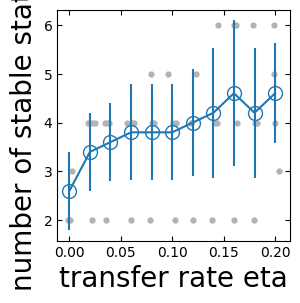

In [6]:
plt.figure(figsize=(3,3))
for i in range(4):
    plt.plot(etas-0.005+0.01*np.random.rand(len(etas)),NumStab[:,i],'.',markersize=7,color=(0.7,0.7,0.7))
plt.errorbar(etas,np.mean(NumStab,1),yerr=np.std(NumStab,1),marker='o',fillstyle='none',markersize=10)
plt.xlabel('transfer rate eta',fontsize=20)
plt.ylabel('number of stable states',fontsize=20)
plt.tick_params(direction='in',top='true',right='true')
plt.savefig('MultiStable.pdf')
plt.show()
import pandas as pd
df=pd.DataFrame(NumStab)
df.to_csv("MultiStable.csv")